Neste notebook será treinada uma rede neural para aprender a função XOR:

In [21]:
import numpy as np
import torch
import torch.nn as nn

In [2]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [3]:
Y = np.array([[1], [0], [0], [1]])
Y

array([[1],
       [0],
       [0],
       [1]])

Define-se a estrutura da rede neural e seus pesos.
Serão 6 pesos na camada de entrada, e 3 pesos na camada oculta

Todos inicializados aleatóriamente seguindo uma distribuição normal

In [4]:
num_neuronios_entrada = 2
num_neuronios_ocultos = 3
num_neuronios_saida = 1

W = {
    "entrada": torch.nn.Parameter(
        torch.randn(num_neuronios_entrada, num_neuronios_ocultos, dtype=torch.float64)
    ),
    "oculta": torch.nn.Parameter(
        torch.randn(num_neuronios_ocultos, num_neuronios_saida, dtype=torch.float64)
    ),
}

W

{'entrada': Parameter containing:
 tensor([[-0.7773, -1.6491, -0.8663],
         [-1.2698, -1.4340,  0.4858]], dtype=torch.float64, requires_grad=True),
 'oculta': Parameter containing:
 tensor([[ 0.7336],
         [-0.3058],
         [ 0.1764]], dtype=torch.float64, requires_grad=True)}

/tmp/ipykernel_173424/1403067640.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(W["entrada"].detach().numpy())


<Axes: ylabel='Density'>

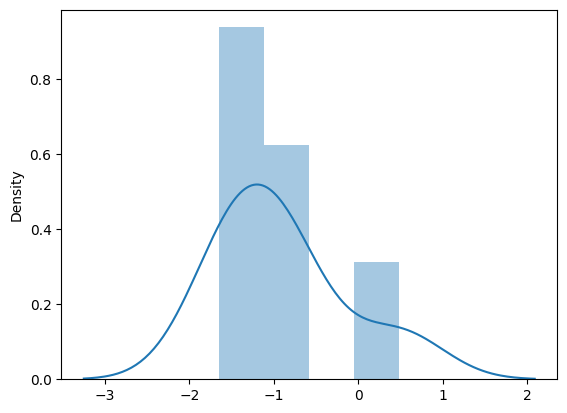

In [5]:
import seaborn as sns

sns.distplot(W["entrada"].detach().numpy())

In [6]:
W["entrada"]

Parameter containing:
tensor([[-0.7773, -1.6491, -0.8663],
        [-1.2698, -1.4340,  0.4858]], dtype=torch.float64, requires_grad=True)

In [7]:
W["entrada"].detach()

tensor([[-0.7773, -1.6491, -0.8663],
        [-1.2698, -1.4340,  0.4858]], dtype=torch.float64)

In [8]:
W["entrada"].detach().numpy()

array([[-0.7773117 , -1.64912498, -0.8662871 ],
       [-1.26980132, -1.43404383,  0.4857803 ]])

/tmp/ipykernel_173424/2865276764.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(W["oculta"].detach().numpy())


<Axes: ylabel='Density'>

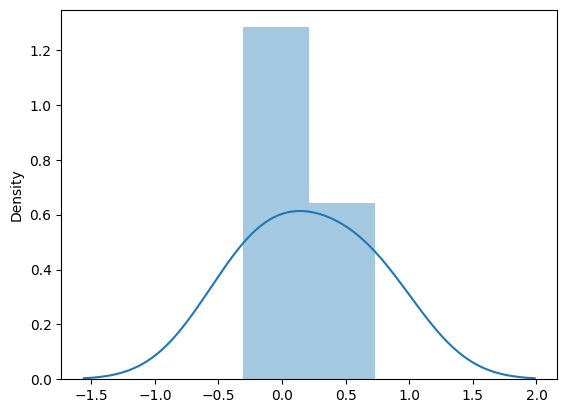

In [9]:
sns.distplot(W["oculta"].detach().numpy())

In [10]:
b = {"entrada": torch.randn(num_neuronios_ocultos, dtype=torch.float64),
     "oculta":  torch.randn(num_neuronios_saida, dtype=torch.float64)}

b

{'entrada': tensor([ 0.2778, -0.6158,  1.2124], dtype=torch.float64),
 'oculta': tensor([-1.6968], dtype=torch.float64)}

In [11]:
values = [W["entrada"], W["oculta"], b["entrada"], b["oculta"]]
values

[Parameter containing:
 tensor([[-0.7773, -1.6491, -0.8663],
         [-1.2698, -1.4340,  0.4858]], dtype=torch.float64, requires_grad=True),
 Parameter containing:
 tensor([[ 0.7336],
         [-0.3058],
         [ 0.1764]], dtype=torch.float64, requires_grad=True),
 tensor([ 0.2778, -0.6158,  1.2124], dtype=torch.float64),
 tensor([-1.6968], dtype=torch.float64)]

In [12]:
otimizador = torch.optim.SGD(
    values, lr=0.3
)

otimizador

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.3
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

Começa o treinamento:

In [13]:
X_t = torch.from_numpy(X).double()
Y_t = torch.from_numpy(Y).double()

for epoch in range(10000):
    # Faz a soma dos pesos * entradas + bias
    soma_camada_oculta = torch.matmul(X_t, W["entrada"]) + b["entrada"]

    # Faz a ativacao da soma para passar como entrada para cada neuronio da camada oculta
    ativacao_camada_oculta = torch.sigmoid(soma_camada_oculta)

      # Repete o processo para camada de saida
    soma_camada_saida = torch.matmul(ativacao_camada_oculta, W["oculta"]) + b["oculta"]
    ativacao_camada_saida = torch.sigmoid(soma_camada_saida)
    
    # Define a funcao custo
    error = torch.mean((Y_t - ativacao_camada_saida) ** 2)

    # Zera gradientes, faz backprop e atualiza pesos
    otimizador.zero_grad()
    error.backward()
    otimizador.step()

    if epoch % 200 == 0:
        # Calcula o erro medio a cada 200 epochs
        print(error.item())

0.33735473352392553
0.23546487700036042
0.21928103716274056
0.20151933002005645
0.18657642137476999
0.17547583611324463
0.16746074440110026
0.16160356447552074
0.157219230107699
0.15385247296313187
0.15120503545748126
0.14907887938466075
0.14733959420778145
0.14589375948478361
0.14467492484008915
0.14363479217007993
0.14273755555292178
0.14195618857132947
0.14126995654633856
0.14066271535452565
0.14012172578150173
0.13963681244382903
0.13919975730335615
0.13880385568446535
0.13844358668624154
0.13811436533987476
0.1378123539999758
0.13753431721759518
0.137277508919054
0.13703958385842213
0.13681852750073137
0.13661260003721676
0.13642029133627548
0.13624028442977193
0.13607142571513292
0.13591270048177995
0.1357632126889799
0.13562216816132444
0.13548886054908596
0.13536265953884938
0.13524300090604663
0.13512937808328013
0.1350213349824626
0.1349184598591322
0.134820380047043
0.13472675742269286
0.13463728448465648
0.1345516809528312
0.13446969080903298
0.13439107971362338


In [14]:
W

{'entrada': Parameter containing:
 tensor([[-5.5302, -3.2451, -4.1280],
         [-6.9527, -4.4393,  7.9405]], dtype=torch.float64, requires_grad=True),
 'oculta': Parameter containing:
 tensor([[5.6301],
         [0.5449],
         [1.6936]], dtype=torch.float64, requires_grad=True)}

In [15]:
b

{'entrada': tensor([ 0.2778, -0.6158,  1.2124], dtype=torch.float64),
 'oculta': tensor([-1.6968], dtype=torch.float64)}

Com a rede neural treinada, vou testar ela:

In [16]:
def nn(x, w, b):
    soma_camada_oculta = torch.matmul(X_t, W["entrada"]) + b["entrada"]
    ativacao_camada_oculta = torch.sigmoid(soma_camada_oculta)
    soma_camada_saida = torch.matmul(ativacao_camada_oculta, W["oculta"]) + b["oculta"]
    ativacao_camada_saida = torch.sigmoid(soma_camada_saida)
    return ativacao_camada_saida.detach().numpy()
    

In [17]:
nn(X_t, W, b)

array([[0.95271115],
       [0.50178019],
       [0.17232127],
       [0.49646419]])

In [18]:
#Para converter um array de probabilidades, em um array de inteiros (0 ou 1).
preds = (nn(X_t, W, b) >= 0.5).astype(int).reshape(4, 1)
print("A entrada: \n" + str(X_t.numpy()) + " \n\nTem saida:\n" + str(preds))


A entrada: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]] 

Tem saida:
[[1]
 [1]
 [0]
 [0]]


Agora farei a mesma rede neural usando abstrações fornecidas pelo pytorch:

In [19]:
device = "cuda" if torch.cuda.is_available() else "cpu"

# 1. Dados
X_t = torch.from_numpy(X).float().to(device)           # shape (4, 2)
Y_t = torch.from_numpy(Y).float().to(device)          # shape (4, 1)

In [22]:
class XorNet(nn.Module):
    def __init__(self, in_features, hidden, out_features):
        super().__init__()
        
        #Definição das arestas entre as camadas de entrada e oculta, e oculta e saída.
        self.hidden = nn.Linear(in_features, hidden)
        self.out = nn.Linear(hidden, out_features)

    def forward(self, x):
        x = torch.sigmoid(self.hidden(x))     # camada oculta
        x = torch.sigmoid(self.out(x))     # saída entre 0 e 1 com sigmoid
        return x

In [23]:
num_hidden = 3

model = XorNet(X_t.shape[1], num_hidden, Y_t.shape[1]).to(device)
model


XorNet(
  (hidden): Linear(in_features=2, out_features=3, bias=True)
  (out): Linear(in_features=3, out_features=1, bias=True)
)

Define-se a função perda:

In [24]:
criterion = nn.MSELoss()
criterion

MSELoss()

Define-se o otimizador:

In [25]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.003)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.003
    maximize: False
    weight_decay: 0
)

Treinamento:

In [26]:
for epoch in range(10000):
    pred = model(X_t)                 # forward
    loss = criterion(pred, Y_t)       # erro médio quadrático

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 200 == 0:
        print(epoch, loss.item())

0 0.2605890929698944
200 0.24985027313232422
400 0.2456691563129425
600 0.2201489806175232
800 0.13337233662605286
1000 0.0665493905544281
1200 0.03815758600831032
1400 0.024587083607912064
1600 0.01714606210589409
1800 0.012625040486454964
2000 0.009664923883974552
2200 0.0076158419251441956
2400 0.00613563135266304
2600 0.00502999871969223
2800 0.004181683994829655
3000 0.0035164118744432926
3200 0.0029851228464394808
3400 0.002554317470639944
3600 0.002200447954237461
3800 0.0019065464148297906
4000 0.0016601113602519035
4200 0.0014517531963065267
4400 0.0012743130791932344
4600 0.0011222405591979623
4800 0.0009911744855344296
5000 0.0008776570903137326
5200 0.0007789026712998748
5400 0.0006926534115336835
5600 0.0006170633714646101
5800 0.0005506082088686526
6000 0.0004920177743770182
6200 0.0004402332124300301
6400 0.0003943589690607041
6600 0.0003536375879775733
6800 0.0003174220910295844
7000 0.0002851609606295824
7200 0.0002563786692917347
7400 0.00023066547873895615
7600 0.000

Testando a rede:

In [30]:
# 6. Predição binária (0 ou 1)
with torch.no_grad():
    probs = model(X_t)                      # valores entre 0 e 1
    preds = (probs >= 0.5).int().view(1,-1) # [[1,0,0,1]] por exemplo
    
    print("A entrada: \n" + str(X_t.cpu().numpy()) + " \n\nTem saida:\n" + str(preds.cpu().numpy()))


A entrada: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]] 

Tem saida:
[[1 0 0 1]]


Gráfico da função aprendida

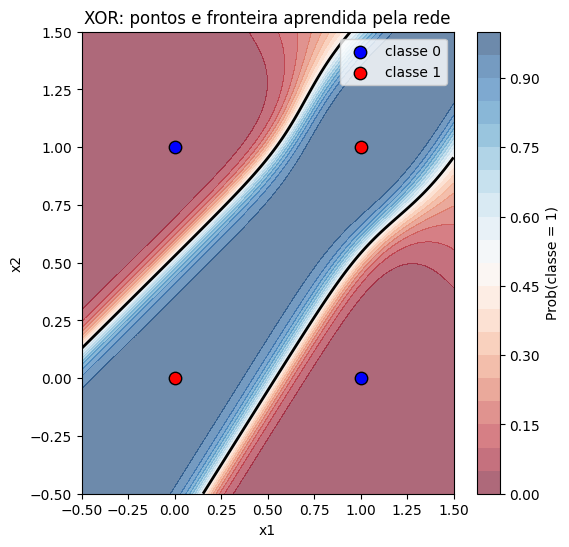

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# grade 2D cobrindo a região do XOR
x_min, x_max = -0.5, 1.5
y_min, y_max = -0.5, 1.5
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

grid = np.c_[xx.ravel(), yy.ravel()].astype(np.float32)
grid_t = torch.from_numpy(grid).to(device)

# saída da rede na grade
with torch.no_grad():
    probs_grid = model(grid_t).cpu().numpy().reshape(xx.shape)  # valores entre 0 e 1

plt.figure(figsize=(6, 6))

# curva de decisão (onde prob = 0.5) + fundo colorido
cs = plt.contourf(xx, yy, probs_grid,
                  levels=np.linspace(0, 1, 21),
                  cmap="RdBu", alpha=0.6)
plt.colorbar(cs, label="Prob(classe = 1)")

plt.contour(xx, yy, probs_grid,
            levels=[0.5], colors="k", linewidths=2)  # fronteira de decisão

# pontos do XOR
Y_flat = Y.ravel()
plt.scatter(X[Y_flat == 0, 0], X[Y_flat == 0, 1],
            c="blue", edgecolor="k", s=80, label="classe 0")
plt.scatter(X[Y_flat == 1, 0], X[Y_flat == 1, 1],
            c="red", edgecolor="k", s=80, label="classe 1")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("XOR: pontos e fronteira aprendida pela rede")
plt.legend()
plt.show()